## Eperimentación en la complejidad temporal

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import subprocess
from experimentacion import *

Generamos 3 clases de input diferentes: uno tendrá actividades con tiempos de inicio y fin randomizados, otro estará ordenado de forma decreciente y con todas sus actividades sin solaparse (peor caso) y el último estará ordenado y con todas sus actividades solapadas (mejor caso).

Iremos generando inputs de cada clase con diferentes tamaños que irán incrementando exponencialmente empezando por 2^8 actividades y terminando con 2^20.

In [ ]:
# Generamos los input
for i in range(8, 21):
    generarInputRandom(2**i)
    generarInputPeorCaso(2**i)
    generarInputMejorCaso(2**i)

# Corremos los experimentos en C++
subprocess.run('../cmake-build-debug/EXP', stdout=subprocess.PIPE)

print("Los inputs fueron generados correctamente")

Primero mostraremos un gráfico que nos demuestre de forma empírica que el tiempo de ejecución es proporcional a la cantidad de actividades, o sea el tamaño de entrada. En caso de que sea lineal, significará que la complejidad temporal de nuestro algoritmo es lineal.

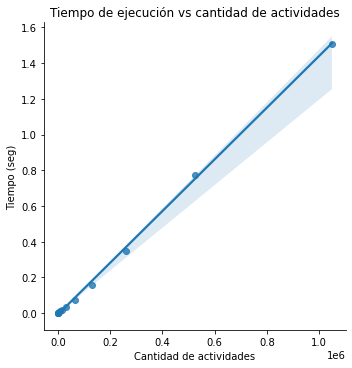

In [47]:
df = pd.read_csv('tiemposRandom.csv')
    
sns.lmplot(x='longitud', y='tiempo', data=df)

plt.title('Tiempo de ejecución vs cantidad de actividades')
plt.ylabel('Tiempo (seg)')
plt.xlabel('Cantidad de actividades')
plt.show()

Este primer gráfico no nos visualiza claramente cada uno de los inputs ya que nuestras cantidades aumentan de manera exponencial, por lo que presentaremos un segundo gráfico mostrando lo mismo pero en escala logarítmica.

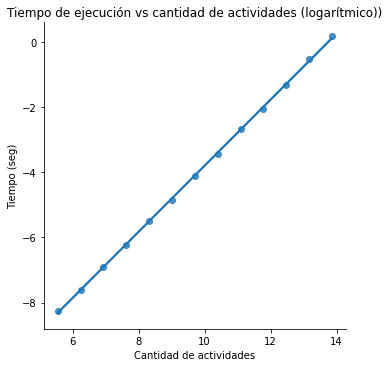

In [46]:
df['tiempo_log'] = np.log(df['tiempo'])
df['longitud_log'] = np.log(df['longitud'])

sns.lmplot(x='longitud_log', y='tiempo_log', data=df)

plt.title('Tiempo de ejecución vs cantidad de actividades (logarítmico))')
plt.ylabel('Tiempo (seg)')
plt.xlabel('Cantidad de actividades')
plt.show()

Acá se aprecia mucho mejor que nuestro algoritmo presenta una complejidad lineal.

También podemos ver cuánta correlación existe entre el tamaño de entrada y el tiempo de ejecución calculando el coeficiente de Pearson, que es una medida de dependencia lineal entre variables. Mientras más cerca esté de 1, más confianza tenemos de que nuestras variables están linealmente correlacionadas.

In [48]:
r = np.corrcoef(df['tiempo'], df['longitud'])[0, 1];
print("El coeficiente de correlación de Pearson es: r = "+str(r))

El coeficiente de correlación de Pearson es: r = 0.9995098544292731


## Experimentación entre distintos conjuntos de instancias

Nuestra hipótesis es que el peor caso se dará cuando tengamos todas las actividades sin solaparase ya que tendrá que ir agregando todas, con lo cual realizará más operaciones que en el caso en el que se solapen. Además, al tener valores de finalización muy grandes (los más grandes posibles), se tendrán que generar mayor cantidad de buckets para ordenar las actividades. 

Mientras tanto en el mejor caso, todas las acividades tendrán un tiempo de finalización muy bajo con lo cual, no habrá que genrar muchos buckets y además sus actividades estarán todas solapadas, por lo que no tendrá que agregar más actividades que la primera, reduciendo la cantidad de operacions a realizar. 

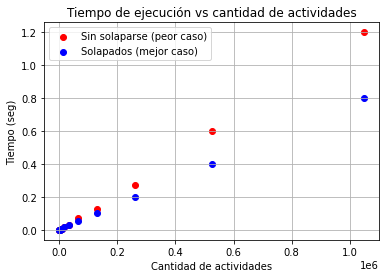

In [44]:
df_peor = pd.read_csv("tiemposPeorCaso.csv")
df_mejor = pd.read_csv("tiemposMejorCaso.csv")

fig, ax = plt.subplots()

ax.scatter(df_peor['longitud'],df_peor['tiempo'],color='red', label='Sin solaparse (peor caso)')
ax.scatter(df_mejor['longitud'],df_mejor['tiempo'],color='blue', label='Solapados (mejor caso)')
plt.title("Tiempo de ejecución vs cantidad de actividades")
plt.xlabel("Cantidad de actividades")
plt.ylabel("Tiempo (seg)")

ax.legend()
ax.grid(True)

plt.show()

A partir de este grafico parece que la ejecución de los casos no solapados (peor caso) es más lenta que los casos solapados. En particular, parece que la pendiente en el caso del mejor caso es mayor, por lo que podríamos decir que vale $tiempo_{peorCaso} = tiempo_{mejorCaso} * c$. Usemos la escala logarítmica para comparar mejor los casos.

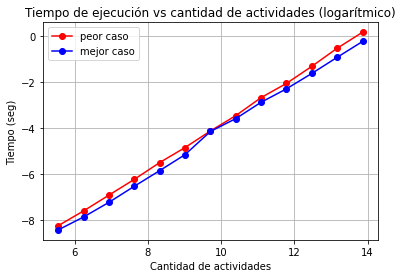

In [45]:
fig, ax = plt.subplots()

ax.plot(np.log(df_peor['longitud']),np.log(df_peor['tiempo']),color='red', label='peor caso', marker='o')
ax.plot(np.log(df_mejor['longitud']),np.log(df_mejor['tiempo']),color='blue', label='mejor caso', marker='o')
plt.xlabel("Cantidad de actividades")
plt.ylabel("Tiempo (seg)")
plt.title("Tiempo de ejecución vs cantidad de actividades (logarítmico)")

ax.legend()
ax.grid(True)

plt.show()

Si $tiempo_{peorCaso} = tiempo_{mejorCaso} * c$ entonces $\log (tiempo_{peorCaso}) = \log(tiempo_{mejorCaso} * c) = \log(tiempo_{mejorCaso}) + \log(c)$. En este último gráfico ambos tiempos parecen diferir solo por esa constante, $\log (c)$. Podemos estimar este valor calculando la diferencia entre ambas rectas.

In [49]:
log_c = np.average(np.log(df_peor['tiempo']) - np.log(df_mejor['tiempo']))
print("La constante entre ambos conjuntos de datos es c = " + str(np.exp(log_c)))

La constante entre ambos conjuntos de datos es c = 1.3007270334186216
